# Loading the data

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100000
pd.options.mode.chained_assignment = None 
df = pd.read_csv('train_lenses_ds_task.csv')

## Checking for null objects

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 6 columns):
item_id           3549 non-null int64
main_text         3549 non-null object
country_name      3549 non-null object
retailer_pg       3549 non-null object
mdm_brand_text    3549 non-null object
mdm_model_text    3549 non-null object
dtypes: int64(1), object(5)
memory usage: 166.4+ KB


## Plotting the distribution over the target(_item id_) values

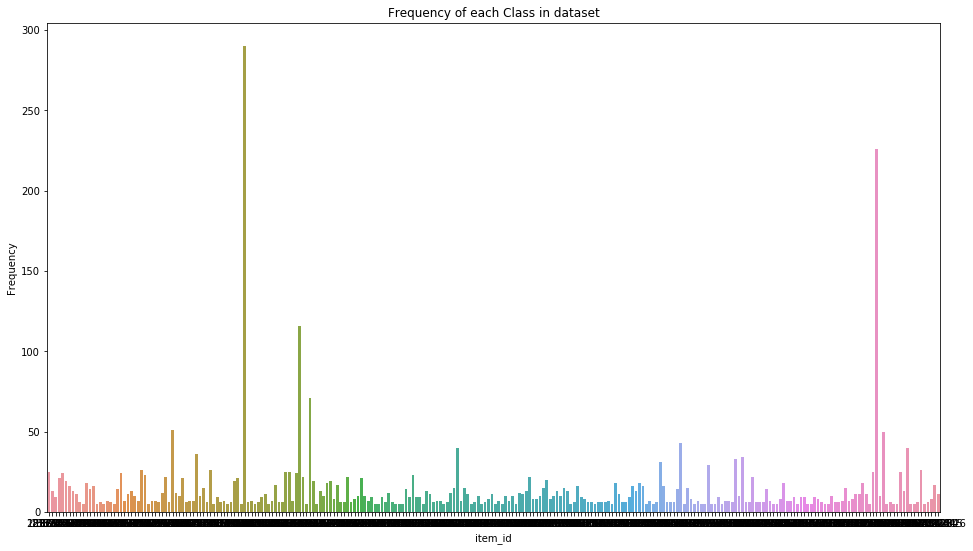

In [3]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='item_id', data=df)
plt.ylabel('Frequency')
plt.title('Frequency of each Class in dataset')
plt.show()

## Plotting the number of unique values in each column

In [4]:
unique_values = dict()
for col in df.columns:
    print("Number of unique items in \"{}\" column are : {}".format(col, len(df[col].unique())))
    unique_values[col] = len(df[col].unique())

Number of unique items in "item_id" column are : 260
Number of unique items in "main_text" column are : 2816
Number of unique items in "country_name" column are : 2
Number of unique items in "retailer_pg" column are : 49
Number of unique items in "mdm_brand_text" column are : 23
Number of unique items in "mdm_model_text" column are : 253


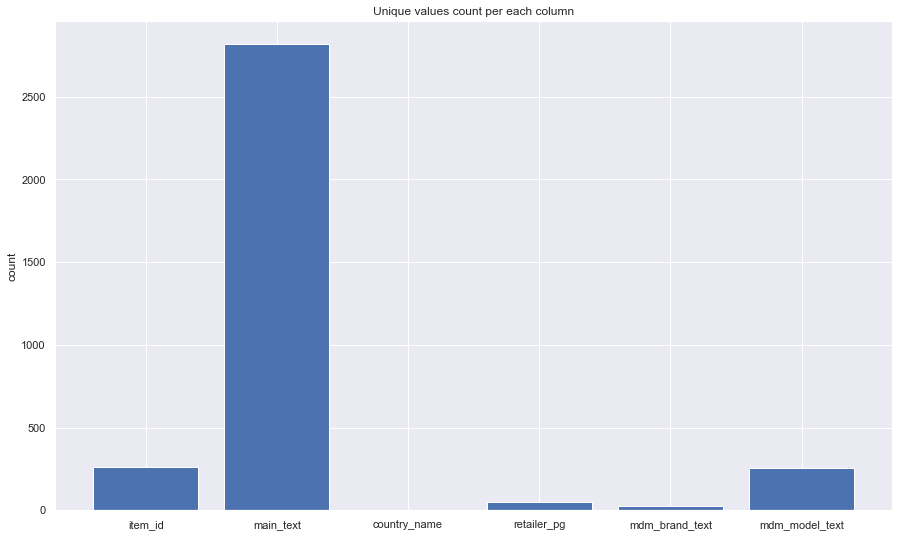

In [5]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,9))
ax.bar(range(len(unique_values)), list(unique_values.values()), align='center')
plt.xticks(range(len(unique_values)), list(unique_values.keys()))
plt.ylabel('count')
plt.title('Unique values count per each column')
plt.show()

1. Importing the necesary libraries
2. Loading the given dataset
3. Creating the train and test dataset 

In [6]:
import pandas as pd
pd.options.display.max_rows = 100000
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from transformers import * 

data = pd.read_csv('train_lenses_ds_task.csv')

X = data[['main_text', 'country_name','retailer_pg', 'mdm_brand_text', 'mdm_model_text']]
y = data['item_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model 1 - Linear Support Vector Classifier (LinearSVC)

### Pipeline with Word Level Tokenizer and LinearSVC Estimator

In [7]:
pipe_lsvc_word = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('word_vectorizer', word_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('word_vectorizer_2', word_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_lsvc_word_classifier', svm.LinearSVC())
])

### Pipeline with Character Level Tokenizer and LinearSVC Estimator

In [8]:
pipe_lsvc_char = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('char_vectorizer', char_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('char_vectorizer_2', char_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_lsvc_char_classifier', svm.LinearSVC())
])

# Model 2 - KNN Classifier

### Pipeline with Word Level Tokenizer and KNN Estimator

In [9]:
pipe_knn_word = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('word_vectorizer', word_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('word_vectorizer_2', word_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_knn_word_classifier', KNeighborsClassifier())
])

### Pipeline with Character Level Tokenizer and KNN Estimator

In [10]:
pipe_knn_char = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('char_vectorizer', char_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('char_vectorizer_2', char_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_knn_char_classifier', KNeighborsClassifier())
])

# Model 3 - Support Vector Classifier (SVC) 

### Pipeline with Word Level Tokenizer and SVC Estimator

In [11]:
pipe_svc_word = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('word_vectorizer', word_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('word_vectorizer_2', word_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_svc_word_classifier', svm.SVC(kernel = 'linear'))
])

### Pipeline with Char Level Tokenizer and SVC Estimator

In [12]:
pipe_svc_char = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('char_vectorizer', char_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('char_vectorizer_2', char_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_svc_char_classifier', svm.SVC(kernel = 'linear'))
])

# Model 4 - Random Forest Classifier (RFC) 

### Pipeline with Word Level Tokenizer and RFC Estimator

In [13]:
pipe_rfc_word = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('word_vectorizer', word_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('word_vectorizer_2', word_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_rfc_word_classifier', RandomForestClassifier(random_state=42))
])

### Pipeline with Char Level Tokenizer and RFC Estimator

In [14]:
pipe_rfc_char = Pipeline([

    ('features', DFFeatureUnion([
        ('fulldataclean', Pipeline([
            ('clean', data_cleaner(column_names = X_train.columns))                    
        ])),
        ('description_features', Pipeline([
            ('extract', RequestedColumns('main_text')),
            ('char_vectorizer', word_vectorizer_df()),
        ])),
        ('mdm_text_features', Pipeline([
            ('extract', RequestedColumns('mdm_model_text')),
            ('char_vectorizer_2', char_vectorizer_df()),
        ])),
        ('categoricals', Pipeline([
            ('extract', RequestedColumns(['country_name','retailer_pg', 'mdm_brand_text'])),
            ('ohe', one_hot_encoder())                  
        ]))       
    ])),
    ('col_remover', col_remover(columns = X_train.columns)),
    ('pipe_rfc_char_classifier', RandomForestClassifier(random_state=42))
])

In [15]:
pipes_list = [pipe_lsvc_word, pipe_lsvc_char, 
              pipe_knn_word, pipe_knn_char, 
              pipe_svc_word, pipe_svc_char, 
              pipe_rfc_word, pipe_rfc_char]

In [16]:
%%time
import os
score_dict = dict()
for index in range(len(pipes_list)):
    file_name = list(pipes_list[index].named_steps.keys())[-1]
    output_dir = 'models_dir2'
    file_path = os.path.join(output_dir, file_name)
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    files = os.listdir('models_dir2/')
    if file_name not in files:
        if "svc" in list(pipes_list[index].named_steps.keys())[-1]:
            print('------------------------------------------------------')
            print("Fitting {} has started".format(file_name))
            print('------------------------------------------------------')
            pipes_list[index].fit(X_train, y_train)
            print('------------------------------------------------------')
            print("Fitting {} completed successfully".format(file_name))
            print('------------------------------------------------------')

        elif 'knn' in list(pipes_list[index].named_steps.keys())[-1]:
            print('------------------------------------------------------')
            print("Fitting {} has started".format(file_name))
            print('------------------------------------------------------')
            param_grid = {list(pipes_list[index].named_steps.keys())[-1] + '__n_neighbors': [1,2,3,4,5,6,7,8]}
            estimator = GridSearchCV(pipes_list[index], param_grid, cv = 5, verbose = 1)
            estimator.fit(X_train, y_train)
            pipes_list[index].set_params(**estimator.best_params_)
            pipes_list[index].fit(X_train, y_train)
            print('------------------------------------------------------')
            print("Fitting {} completed successfully".format(file_name))
            print('------------------------------------------------------')

        else:
            print('------------------------------------------------------')
            print("Fitting {} has started".format(file_name))
            print('------------------------------------------------------')
            param_grid = {
                file_name + '__n_estimators': [900, 1000],
                file_name + '__max_features': ['auto'],
                file_name + '__max_depth' : [15],
                file_name + '__criterion' :['entropy']
            }
            estimator = GridSearchCV(pipes_list[index], param_grid, refit = True, cv = 3, verbose = 2)
            estimator.fit(X_train, y_train)
            pipes_list[index].set_params(**estimator.best_params_)
            pipes_list[index].fit(X_train, y_train)
            print('------------------------------------------------------')
            print("Fitting {} completed successfully".format(file_name))
            print('------------------------------------------------------')
            
        print('Saving model in : {}'.format(file_name))
        
        with open(file_path, 'wb') as file_writer:
            pickle.dump(pipes_list[index], file_writer, protocol=pickle.HIGHEST_PROTOCOL)

        y_hat = pipes_list[index].predict(X_test)
        score  = accuracy_score(y_test, y_hat)
        print(score)
        score_dict[list(pipes_list[index].named_steps.keys())[-1]] = score
        with open(os.path.join(output_dir, file_name + '_scores'), 'wb') as file_writer:
            pickle.dump(score_dict, file_writer, protocol=pickle.HIGHEST_PROTOCOL)
with open(os.path.join(output_dir, 'scores'), 'wb') as file_writer:
    pickle.dump(score_dict, file_writer, protocol=pickle.HIGHEST_PROTOCOL)

------------------------------------------------------
Fitting pipe_lsvc_word_classifier has started
------------------------------------------------------
------------------------------------------------------
Fitting pipe_lsvc_word_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_lsvc_word_classifier
0.9829351535836177
------------------------------------------------------
Fitting pipe_lsvc_char_classifier has started
------------------------------------------------------
------------------------------------------------------
Fitting pipe_lsvc_char_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_lsvc_char_classifier
0.9837883959044369
------------------------------------------------------
Fitting pipe_knn_word_classifier has started
------------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.1min finished
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


------------------------------------------------------
Fitting pipe_knn_word_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_knn_word_classifier
0.9146757679180887
------------------------------------------------------
Fitting pipe_knn_char_classifier has started
------------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 62.7min finished
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


------------------------------------------------------
Fitting pipe_knn_char_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_knn_char_classifier
0.939419795221843
------------------------------------------------------
Fitting pipe_svc_word_classifier has started
------------------------------------------------------
------------------------------------------------------
Fitting pipe_svc_word_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_svc_word_classifier
0.9778156996587031
------------------------------------------------------
Fitting pipe_svc_char_classifier has started
------------------------------------------------------
------------------------------------------------------
Fitting pipe_svc_char_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_svc_char_classifier
0.9778156996587031
-------

C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=900, total=  10.9s
[CV] pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=900 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=900, total=  11.6s
[CV] pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=900 
[CV]  pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=900, total=  11.8s
[CV] pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=1000 
[CV]  pipe_rfc_word_classifier__criterion=entropy, pipe_rfc_word_classifier__max_depth=15, pipe_rfc_word_classifier__max_features=auto, pipe_rfc_word_classifier__n_estimators=1000, total=  12.2s
[CV] pipe_rfc_word_classifier__criterion=entropy, pipe_rfc

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min finished
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


------------------------------------------------------
Fitting pipe_rfc_word_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_rfc_word_classifier
0.9735494880546075
------------------------------------------------------
Fitting pipe_rfc_char_classifier has started
------------------------------------------------------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900 


C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900, total=  19.5s
[CV] pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV]  pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900, total=  20.2s
[CV] pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900 
[CV]  pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=900, total=  20.7s
[CV] pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=1000 
[CV]  pipe_rfc_char_classifier__criterion=entropy, pipe_rfc_char_classifier__max_depth=15, pipe_rfc_char_classifier__max_features=auto, pipe_rfc_char_classifier__n_estimators=1000, total=  21.0s
[CV] pipe_rfc_char_classifier__criterion=entropy, pipe_rfc

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min finished
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


------------------------------------------------------
Fitting pipe_rfc_char_classifier completed successfully
------------------------------------------------------
Saving model in : pipe_rfc_char_classifier
0.992320819112628
Wall time: 1h 44min 19s


In [17]:
score_dict

{'pipe_lsvc_word_classifier': 0.9829351535836177,
 'pipe_lsvc_char_classifier': 0.9837883959044369,
 'pipe_knn_word_classifier': 0.9146757679180887,
 'pipe_knn_char_classifier': 0.939419795221843,
 'pipe_svc_word_classifier': 0.9778156996587031,
 'pipe_svc_char_classifier': 0.9778156996587031,
 'pipe_rfc_word_classifier': 0.9735494880546075,
 'pipe_rfc_char_classifier': 0.992320819112628}

Text(0.5, 1.0, 'Different models with accuracy scores')

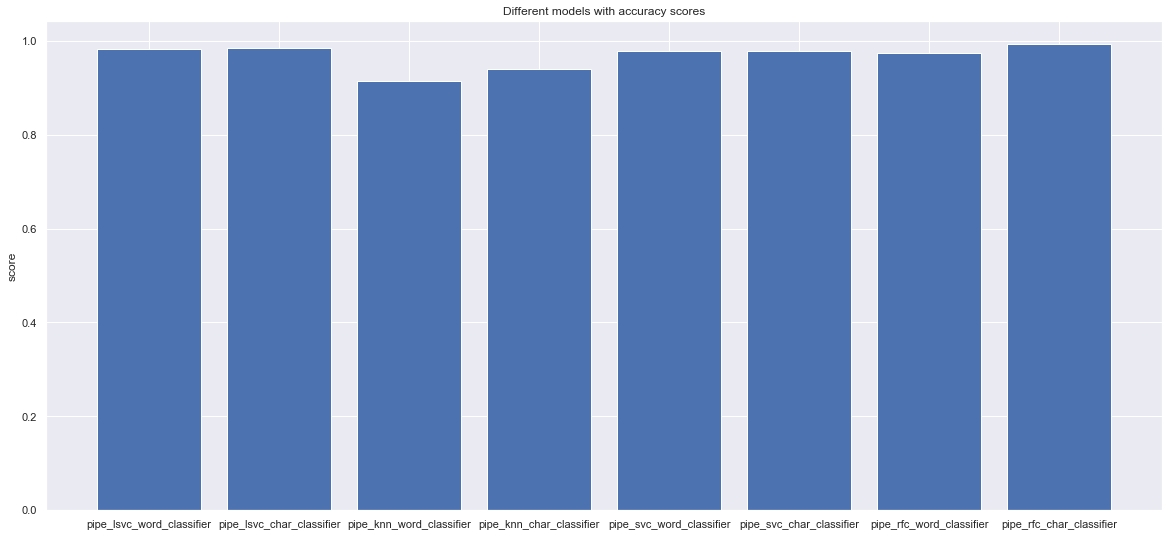

In [18]:
plt.figure(figsize=(20,9))
plt.bar(range(len(score_dict)), list(score_dict.values()), align='center')
plt.xticks(range(len(score_dict)), list(score_dict.keys()))
plt.ylabel('score')
plt.title('Different models with accuracy scores')

# Loading the model with the highest accuracy score

In [19]:
with open(os.path.join('models_dir2', 'pipe_rfc_char_classifier'), "rb") as input_file:
    model = pickle.load(input_file)

In [20]:
model

Pipeline(memory=None,
         steps=[('features',
                 <transformers.DFFeatureUnion object at 0x0000021EDA903550>),
                ('col_remover',
                 <transformers.col_remover object at 0x0000021E81CDF7B8>),
                ('pipe_rfc_char_classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=900, n_jobs=None,
                                        oob_score=False, random_state=42,
                   

In [21]:
y_hat = model.predict(X_test)
score  = accuracy_score(y_test, y_hat)
score

0.992320819112628

In [22]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

     2296911       0.86      1.00      0.92         6
    18378494       1.00      1.00      1.00         3
    18378572       1.00      1.00      1.00         8
    18378781       1.00      1.00      1.00        11
    19026396       1.00      1.00      1.00         4
    23824473       1.00      1.00      1.00         7
    24493444       1.00      1.00      1.00         5
    25110766       1.00      1.00      1.00         2
    25714995       1.00      1.00      1.00         2
    26714969       1.00      1.00      1.00         6
    26726405       1.00      1.00      1.00         5
    28965410       1.00      1.00      1.00         6
    30524469       1.00      1.00      1.00         4
    33336411       1.00      1.00      1.00         1
    35296740       1.00      1.00      1.00         1
    38599049       1.00      1.00      1.00         3
    44682227       1.00      1.00      1.00         2
    48759730       1.00    

C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vamshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Vamshi\Anaconda3\li